In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('Autism104.csv')
asd=pd.DataFrame()

In [9]:
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,?,no,no,Albania,no,7,12-16 years,?,YES


## DATA ANALYSIS

In [18]:
cols=list(df.columns)
cols

['id',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'result',
 'age_desc',
 'relation',
 'Class/ASD']

In [19]:
def func(x):
    if x=='?':
        x=np.nan
        return x
    return x
#df['rbcd']=df['rbc'].apply(func)
for x in cols:
    asd[x]=df[x].apply(func)

In [20]:
asd.drop('id',axis=1,inplace=True)
asd.drop('contry_of_res',axis=1,inplace=True)
asd.drop('used_app_before',axis=1,inplace=True)

In [21]:
asd.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,12,f,NaN,no,no,2,12-16 years,NaN,NO
3,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,16,f,NaN,no,no,7,12-16 years,NaN,YES


In [22]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 19 columns):
A1_Score     104 non-null int64
A2_Score     104 non-null int64
A3_Score     104 non-null int64
A4_Score     104 non-null int64
A5_Score     104 non-null int64
A6_Score     104 non-null int64
A7_Score     104 non-null int64
A8_Score     104 non-null int64
A9_Score     104 non-null int64
A10_Score    104 non-null int64
age          104 non-null int64
gender       104 non-null object
ethnicity    98 non-null object
jundice      104 non-null object
austim       104 non-null object
result       104 non-null int64
age_desc     104 non-null object
relation     98 non-null object
Class/ASD    104 non-null object
dtypes: int64(12), object(7)
memory usage: 15.5+ KB


In [23]:
asd.index

RangeIndex(start=0, stop=104, step=1)

In [24]:
cols=list(asd.columns)
num_cols = asd._get_numeric_data().columns
num_cols=list(num_cols)
num_cols

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'result']

In [25]:
cat_cols=list(set(cols) - set(num_cols))
cat_cols

['gender',
 'austim',
 'age_desc',
 'relation',
 'ethnicity',
 'Class/ASD',
 'jundice']

## Data Cleaning

In [26]:
asd['age'].fillna(int(asd['age'].mean()),inplace=True)

In [27]:
len(asd['age'])

104

In [28]:
asd['result'].fillna(int(asd['result'].mean()),inplace=True)

In [29]:
l=[]
for x in num_cols[:-2]:
    y=asd[x].value_counts()
    l.append(y)

In [30]:
l

[1    76
 0    28
 Name: A1_Score, dtype: int64, 1    56
 0    48
 Name: A2_Score, dtype: int64, 1    68
 0    36
 Name: A3_Score, dtype: int64, 1    73
 0    31
 Name: A4_Score, dtype: int64, 1    78
 0    26
 Name: A5_Score, dtype: int64, 1    80
 0    24
 Name: A6_Score, dtype: int64, 1    54
 0    50
 Name: A7_Score, dtype: int64, 1    64
 0    40
 Name: A8_Score, dtype: int64, 1    82
 0    22
 Name: A9_Score, dtype: int64, 1    68
 0    36
 Name: A10_Score, dtype: int64]

In [31]:
cat_cols

['gender',
 'austim',
 'age_desc',
 'relation',
 'ethnicity',
 'Class/ASD',
 'jundice']

In [32]:
l=[]
for x in cat_cols:
    y=list(asd[x].value_counts())
    l.append(y)
l

[[54, 50],
 [90, 14],
 [97, 7],
 [45, 36, 8, 6, 3],
 [40, 16, 12, 9, 8, 5, 5, 3],
 [63, 41],
 [88, 16]]

In [33]:
for x in l:
    print(sum(x))

104
104
104
98
98
104
104


In [34]:
asd['ethnicity'].value_counts()

White-European     40
Asian              16
Others             12
Middle Eastern      9
Black               8
Latino              5
Hispanic            5
South Asian         3
Name: ethnicity, dtype: int64

In [35]:
asd['ethnicity'].fillna('White-European',inplace=True)

In [36]:
asd['relation'].value_counts()

Self                        45
Parent                      36
Relative                     8
Health care professional     6
Others                       3
Name: relation, dtype: int64

In [37]:
asd['relation'].fillna('Self',inplace=True)

## Data Visualisation


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


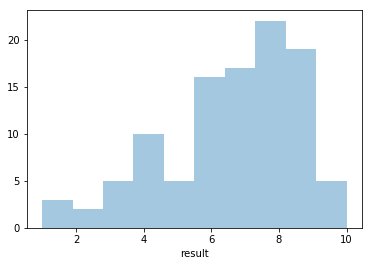

In [38]:
sns.distplot(asd['result'],kde=False,bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


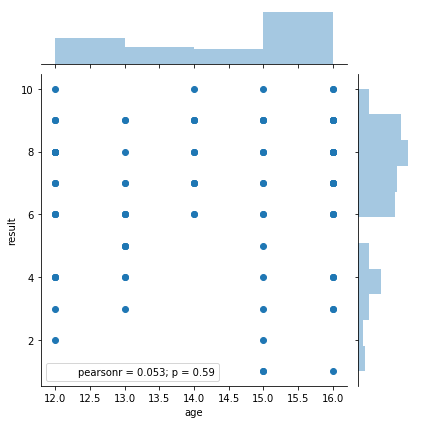

In [39]:
sns.jointplot(x='age',y='result',data=asd,kind='scatter')

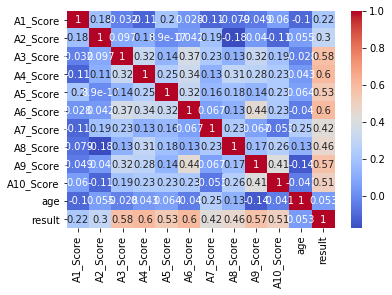

In [40]:
sns.heatmap(asd.corr(),cmap='coolwarm',annot=True)

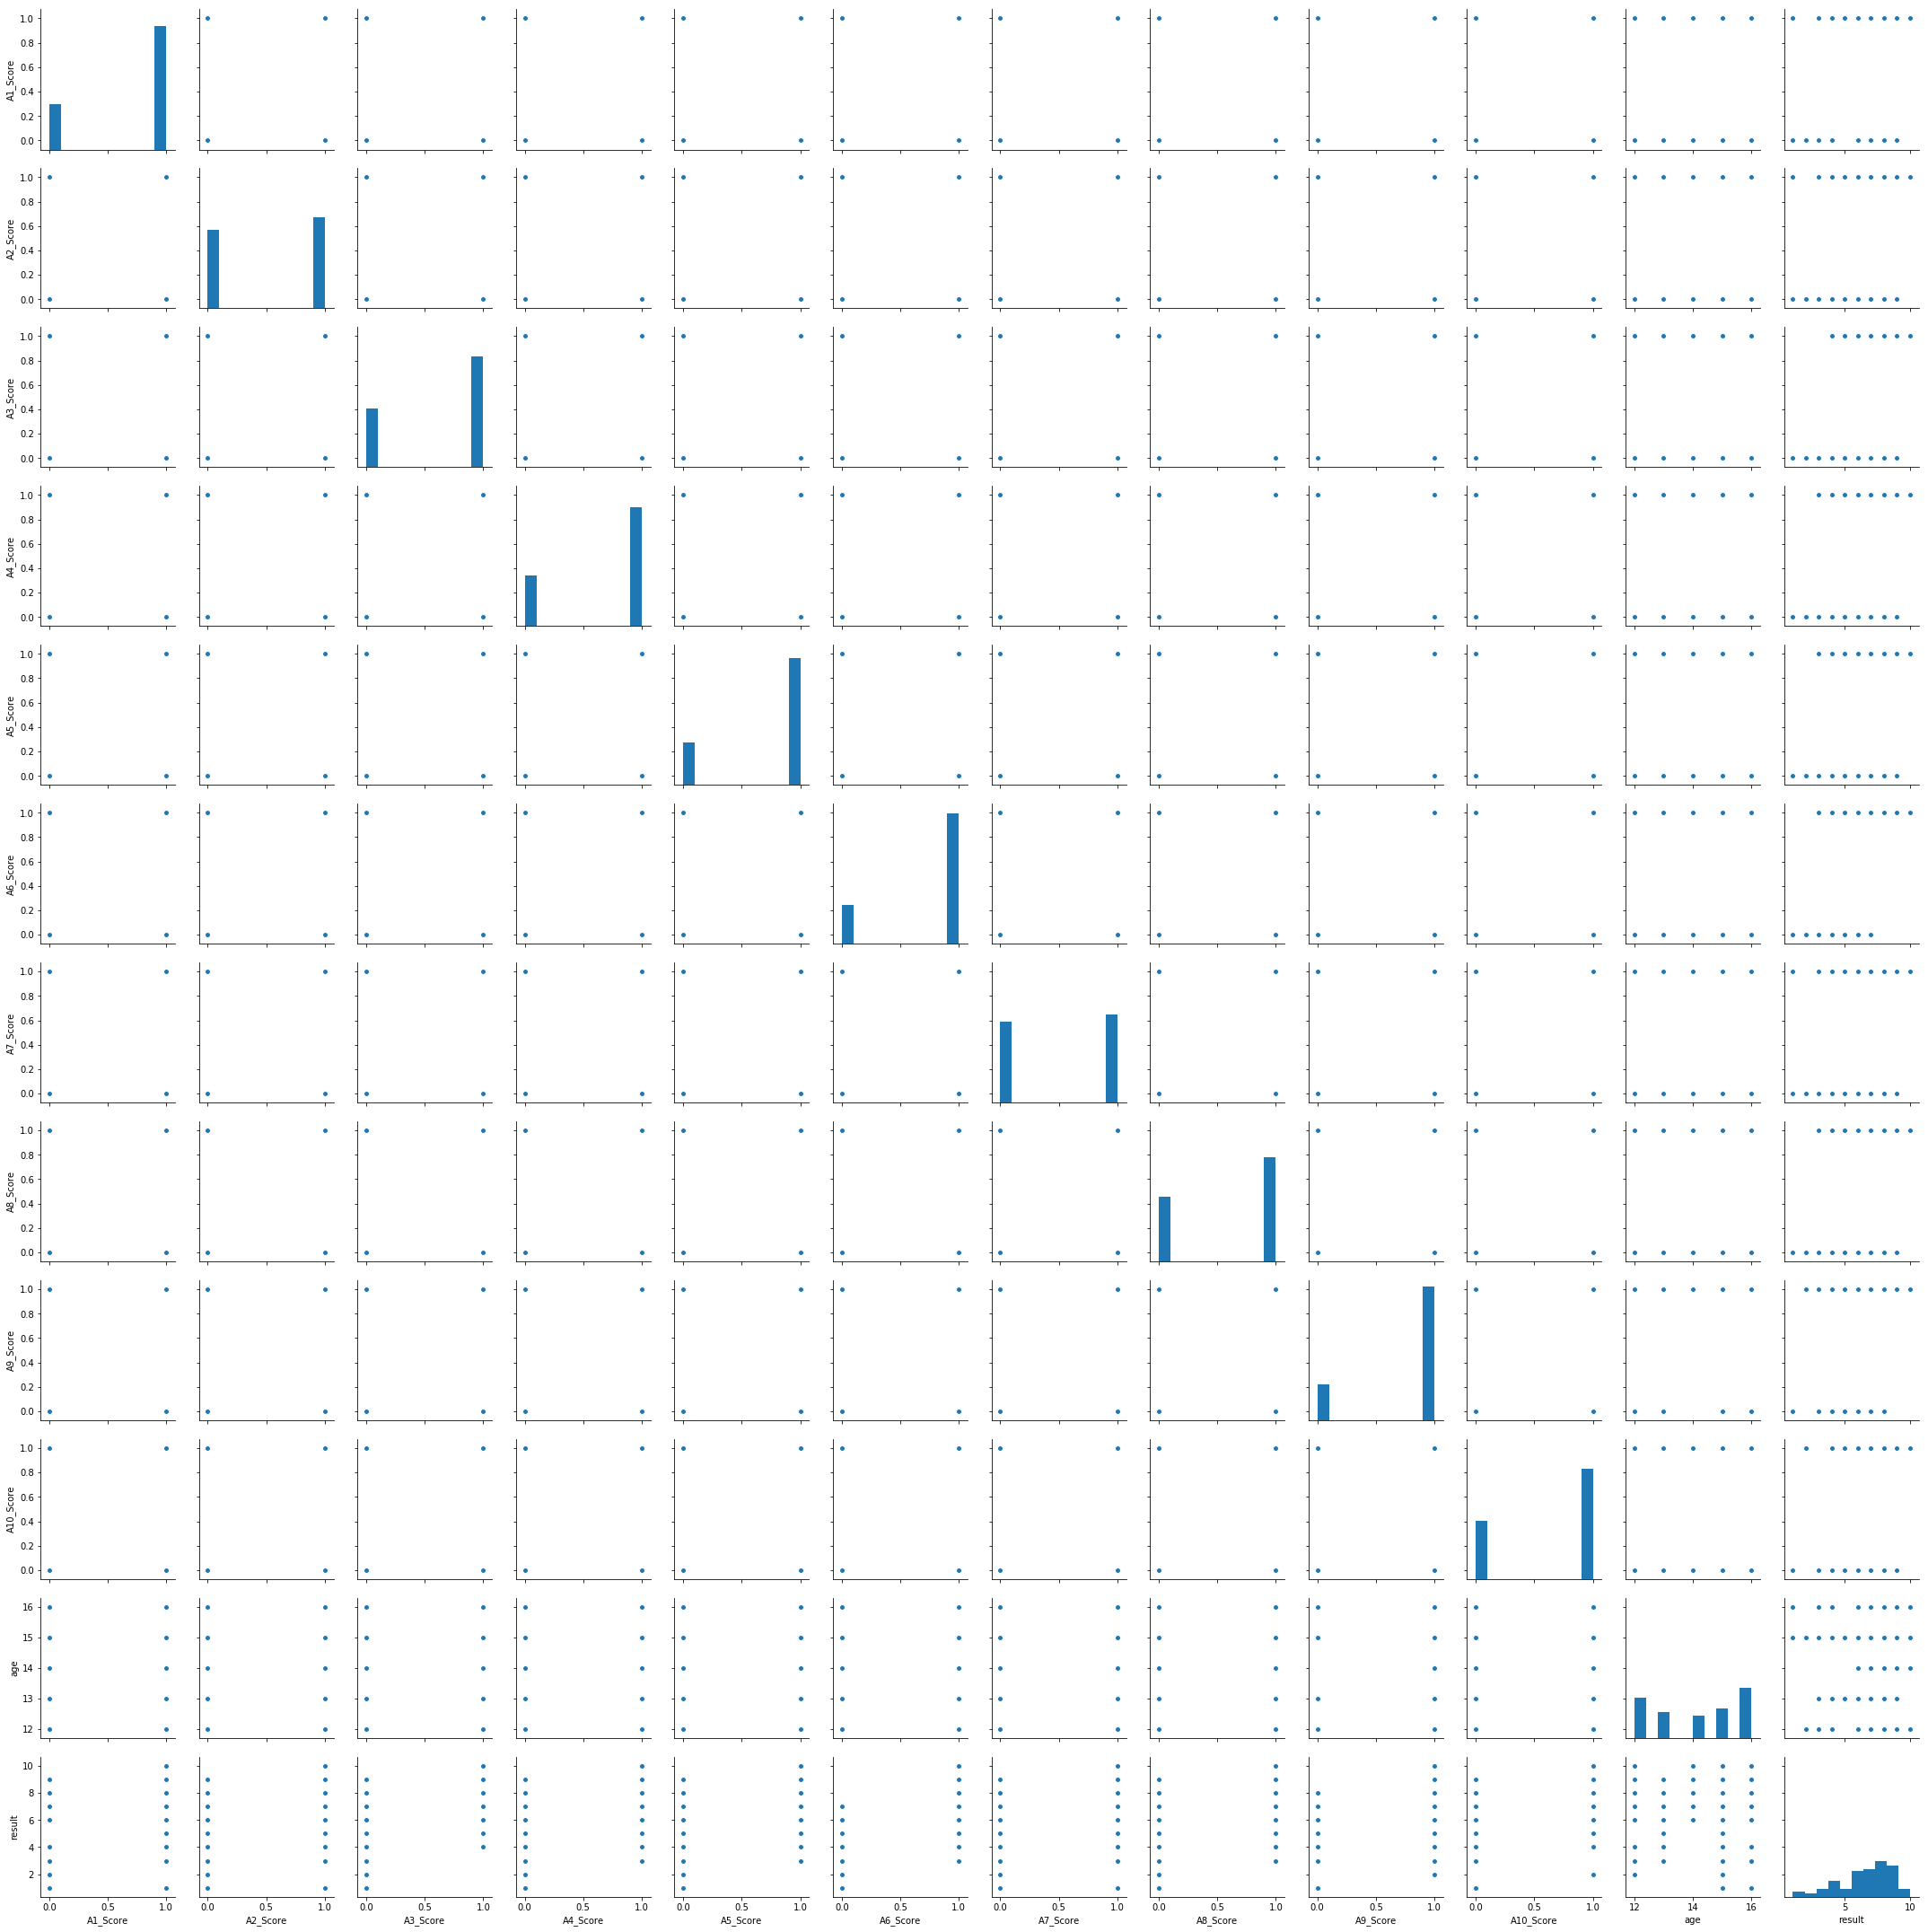

In [41]:
sns.pairplot(asd)

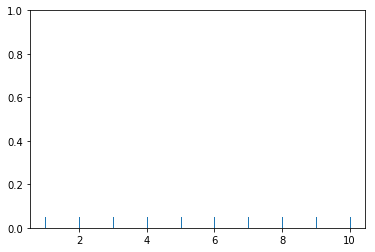

In [42]:
sns.rugplot(asd['result'])

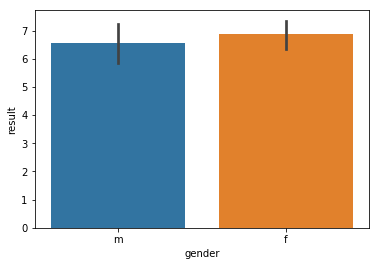

In [43]:
sns.barplot(x='gender',y='result',data=asd)

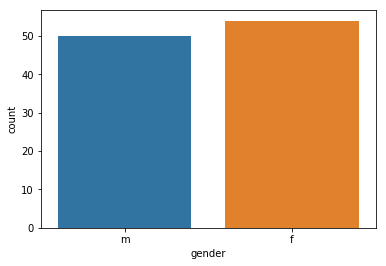

In [44]:
sns.countplot(x='gender',data=asd)

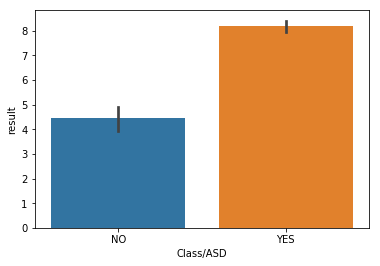

In [45]:
sns.barplot(x='Class/ASD',y='result',data=asd)

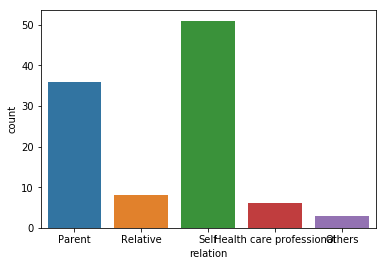

In [46]:
sns.countplot(x='relation',data=asd)

## Converting categorical columns to numerical columns

In [47]:
asd.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,12,f,White-European,no,no,2,12-16 years,Self,NO
3,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,16,f,White-European,no,no,7,12-16 years,Self,YES


In [48]:
jundice=pd.get_dummies(asd['jundice'],drop_first=True)
gender=pd.get_dummies(asd['gender'],drop_first=True)
ethnicity=pd.get_dummies(asd['ethnicity'],drop_first=True)
relation=pd.get_dummies(asd['relation'],drop_first=True)
age_desc=pd.get_dummies(asd['age_desc'],drop_first=True)
Class_ASD=pd.get_dummies(asd['Class/ASD'],drop_first=True)
autism=pd.get_dummies(asd['austim'],drop_first=True)

#asd.drop(cat_cols,axis=1,inplace=True)
#asd=pd.concat([],axis=1)

In [49]:
asd.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,12,f,White-European,no,no,2,12-16 years,Self,NO
3,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,16,f,White-European,no,no,7,12-16 years,Self,YES


In [50]:
asd.drop(['jundice',
 'gender',
 'ethnicity',
 'relation',
 'age_desc',
 'austim','Class/ASD'],axis=1,inplace=True)

In [51]:
asd = pd.concat([asd,jundice,
 gender,
 ethnicity,
 relation,
 age_desc,
 Class_ASD,
 autism],axis=1)

In [52]:
asd.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Others,South Asian,White-European,Others,Parent,Relative,Self,12-16 years,YES,yes
0,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,0,0
3,0,1,1,1,1,1,0,1,1,0,...,0,0,1,0,0,0,1,1,1,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,1,1,1,0


## Applying Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(asd.drop('YES',axis=1), 
                                                    asd['YES'], test_size=0.30, 
                                                    random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
predictions = logmodel.predict(X_test)

### Evaluation

In [58]:
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.95      0.95      0.95        20

avg / total       0.94      0.94      0.94        32



## Applying K nearest neighbours

In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(asd.drop('YES',axis=1))
scaled_features=scaler.transform(asd.drop('YES',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
df_feat = pd.DataFrame(scaled_features,columns=asd.columns[:-1])
df_feat.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Middle Eastern,Others,South Asian,White-European,Others,Parent,Relative,Self,12-16 years,YES
0,-1.647509,-1.080123,-1.374369,0.651658,0.577350,0.547723,0.96225,0.790569,0.517970,-1.374369,...,-0.307794,-0.361158,-0.172345,-0.890564,-0.172345,1.374369,-0.288675,-0.980951,0.268635,2.535463
1,-1.647509,-1.080123,-1.374369,-1.534548,-1.732051,-1.825742,-1.03923,-1.264911,0.517970,0.727607,...,-0.307794,-0.361158,-0.172345,-0.890564,-0.172345,-0.727607,3.464102,-0.980951,0.268635,-0.394405
2,-1.647509,-1.080123,-1.374369,-1.534548,-1.732051,-1.825742,-1.03923,-1.264911,0.517970,0.727607,...,-0.307794,-0.361158,-0.172345,1.122884,-0.172345,-0.727607,-0.288675,1.019419,0.268635,-0.394405
3,-1.647509,0.925820,0.727607,0.651658,0.577350,0.547723,-1.03923,0.790569,0.517970,-1.374369,...,-0.307794,-0.361158,-0.172345,1.122884,-0.172345,-0.727607,-0.288675,1.019419,0.268635,-0.394405
4,0.606977,0.925820,0.727607,0.651658,0.577350,0.547723,0.96225,-1.264911,-1.930615,-1.374369,...,-0.307794,-0.361158,-0.172345,1.122884,-0.172345,-0.727607,-0.288675,1.019419,0.268635,-0.394405


In [63]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,asd['YES'],
                                                    test_size=0.30)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [67]:
pred=knn.predict(X_test)

In [68]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 7  7]
 [ 2 16]]
             precision    recall  f1-score   support

          0       0.78      0.50      0.61        14
          1       0.70      0.89      0.78        18

avg / total       0.73      0.72      0.71        32



In [69]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

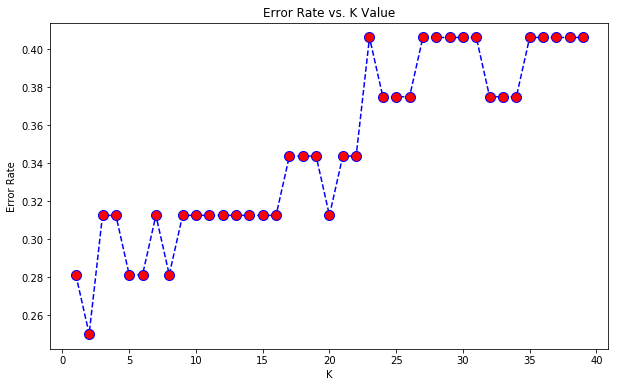

In [70]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Applying Decision trees and random forests

In [71]:
X = asd.drop('YES',axis=1)
y = asd['YES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree = DecisionTreeClassifier()

In [74]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
predictions = dtree.predict(X_test)

In [76]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        32



In [77]:
print(confusion_matrix(y_test,predictions))

[[12  0]
 [ 0 20]]


## Random Forests

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=600)


In [80]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
predictions = rfc.predict(X_test)

In [82]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        20

avg / total       1.00      1.00      1.00        32



In [83]:
print(confusion_matrix(y_test,predictions))

[[12  0]
 [ 0 20]]
